In [ ]:
# Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# DataFrame 1: Job Details
df_jobs = pd.DataFrame({
    'job_id': [101, 102, 103, 104, 105],
    'job_title': ['Data Analyst', 'Software Engineer', 'Product Manager', 'UX Designer', 'Marketing Specialist'],
    'company_name': ['TechNova', 'InnoSoft', 'BrightPath', 'Designly', 'MarketWise'],
    'job_location': ['New York, NY', 'San Francisco, CA', 'Austin, TX', 'Seattle, WA', 'Chicago, IL']
})

# DataFrame 2: Company Details
df_companies = pd.DataFrame({
    'company_name': ['TechNova', 'InnoSoft', 'BrightPath', 'Designly', 'MarketWise'],
    'industry': ['Technology', 'Software Development', 'E-commerce', 'Design', 'Marketing'],
    'company_size': ['201-500', '51-200', '501-1000', '11-50', '101-250']
})

# creating 2 new data frames to practice this merge technique

In [7]:
df_jobs

,job_id,job_title,company_name,job_location
0,101,Data Analyst,TechNova,"New York, NY"
1,102,Software Engineer,InnoSoft,"San Francisco, CA"
2,103,Product Manager,BrightPath,"Austin, TX"
3,104,UX Designer,Designly,"Seattle, WA"
4,105,Marketing Specialist,MarketWise,"Chicago, IL"


In [9]:
df_companies

,company_name,industry,company_size
0,TechNova,Technology,201-500
1,InnoSoft,Software Development,51-200
2,BrightPath,E-commerce,501-1000
3,Designly,Design,11-50
4,MarketWise,Marketing,101-250


In [11]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,101,Data Analyst,TechNova,"New York, NY",Technology,201-500
1,102,Software Engineer,InnoSoft,"San Francisco, CA",Software Development,51-200
2,103,Product Manager,BrightPath,"Austin, TX",E-commerce,501-1000
3,104,UX Designer,Designly,"Seattle, WA",Design,11-50
4,105,Marketing Specialist,MarketWise,"Chicago, IL",Marketing,101-250


In [16]:
# bringing in code from the previous exercise to make job postings by month pivot

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_usa = df[df['job_country'] == 'United States']

df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')

df_usa_pivot = df_usa.pivot_table(index= 'job_posted_month', columns='job_title_short', aggfunc='size')

df_usa_pivot.reset_index(inplace=True)
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_month'], format='%B').dt.month
df_usa_pivot.sort_values('month_no', inplace=True)
df_usa_pivot.set_index('job_posted_month', inplace=True)
df_usa_pivot.drop(columns='month_no', inplace=True)

df_usa_pivot


C:\Users\shawn\AppData\Local\Temp\ipykernel_11608\2495284671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime('%B')


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [ ]:
df_usa_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')

df_usa_software_pivot

# bringing in the table we are going to merge our other job posting data with

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [27]:
df_usa_merged = df_usa_pivot.merge(df_usa_software_pivot, on='job_posted_month')

In [34]:
top_5 = df_usa_merged.sum().sort_values(ascending=False).head(5).index.to_list()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

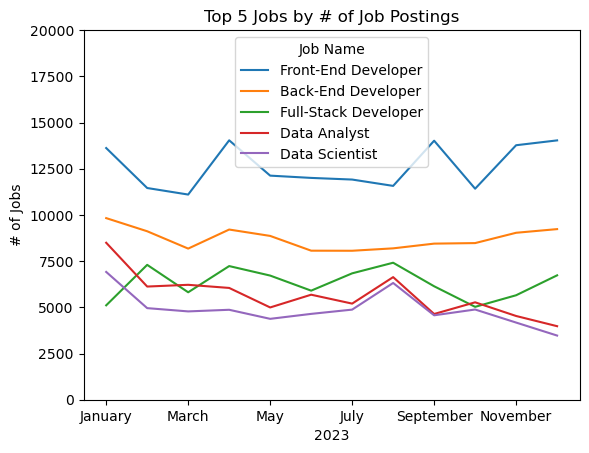

In [39]:
df_usa_merged[top_5].plot(kind='line')
plt.xlabel('2023')
plt.ylabel('# of Jobs')
plt.title('Top 5 Jobs by # of Job Postings')
plt.legend(title='Job Name')
plt.ylim((0, 20000))
plt.show()
